# i. INTRODUCTION

    - Nama : Arisha Yenadi Putra
    - Kelas : Data Science Fullstack Batch 07

MILESTONE 1

Gambaran data set yang digunakan adalah Data Frame yang terdiri dari 41.188 rows dan 21 columns. dan tipe data yang terdapat dalam data frame ini :
- Float
- Integer
- Object

Description : Sebuah bank melakukan marketing campign terhadap client baru untuk melakukan deposit di Bank Mereka

Objective :
- Memahami konsep peng-aplikasian model supervised learning untuk memprediksi akankah client akan berlangganan di bank kita
- Mempersiapkan data dan megolah data tersebut untuk digunakan dalam model supervised learning
- Mengimplementasikan supervised learning dengan data yang diberikan
- Melakukan evaluasi model yaitu Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, Stochastic Gradient Descent
- Melakukan model tuning pada model terpilih
- Melakukan model inference dengan model terpilih yang sudah di tuning parameternya

# ii. IMPORT LIBRARY

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [113]:
# Untuk ngilangin warning pada plot

import warnings
warnings.filterwarnings('ignore') 

In [114]:
# Classification Report
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# K-fold Cross Validation
from sklearn.model_selection import cross_val_score

# F1-Score
from sklearn.metrics import f1_score

# Menditeksi Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Super Vector Machine
from sklearn.svm import SVC

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# K-Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier

# Split Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Laber Encoder
from sklearn.preprocessing import LabelEncoder

# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

# Parameter Tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# iii. DATA LOADING

In [115]:
# Menginput Dataset Bank Subscription
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [116]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- 1 - age
- 2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index/ Indeks Harga Konsumen - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index/ Indeks Kepercayaan Konsumen - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [117]:
df.shape

(41188, 21)

- Pada dataset ini terdapat 41.188 Baris dan 21 Kolom

In [118]:
# Mengecek kata kunci yang ada pada dataset
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [119]:
# Melihat mean, std, mode, Q1, Q2, Q3, Min, dan Max pada dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


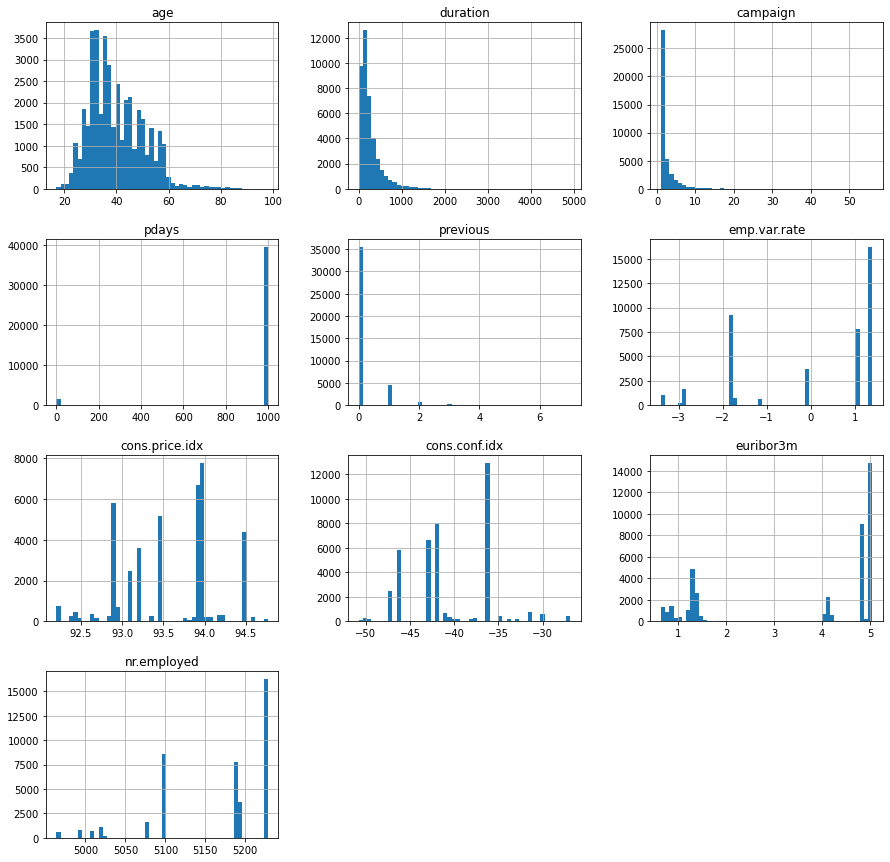

In [120]:
# Melihat gambaran distribusi data menggunakan grafik histogram
%matplotlib inline
df.hist(bins=50, figsize=(15,15))
plt.show()

- Bisa dilihat untuk persebaran data pada kolom numeric yang dimana didominasi dengan distribusi tidak normal atau skewed

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Pada dataset ini tidak ditemukannya missing value dan type data terdiri dari Float, Integer, Object

In [122]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- Untuk memastikan lagi bahwa tidak ada missing value pada setiap kolom

# iv. DATA EXPLORATION

In [123]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [124]:
# Melihat kolom apa saja yang ada pada dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [125]:
# Melihat isi unik data yang ada pada kolom job
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [126]:
# Melihat isi unik data yang ada pada kolom marital
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [127]:
# Melihat isi unik data yang ada pada kolom education
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [128]:
# Melihat isi unik data yang ada pada kolom default
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [129]:
# Melihat isi unik data yang ada pada kolom housing
df.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [130]:
# Melihat isi unik data yang ada pada kolom loan
df.loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [131]:
# Melihat isi unik data yang ada pada kolom contact
df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [132]:
# Melihat isi unik data yang ada pada kolom month
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [133]:
# Melihat isi unik data yang ada pada kolom day_of_week
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [134]:
# Melihat isi unik data yang ada pada kolom poutcome
df.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [135]:
# Melihat isi unik data yang ada pada kolom y (target pada dataset ini)
df.y.unique()

array(['no', 'yes'], dtype=object)

In [136]:
# Membandingkan banyaknya jumlah pada setiap kategori di kolom job
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

- Disini bisa dilihat bahwa customer yang dihubungi dari pihak bank paling banyak berkerja di bagian admin dan untuk yang jarang dihubungi adalah student. Dan untuk customer yang tidak diketahui pekerjaannya sangat jarang dihubungi dari pihak bank

In [137]:
# Melihat perbandingan label pada target (y)
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [138]:
# Melihat jumlah konsumen dari status perkawinan dengan berbagai bidang pekerjaan
compare1 = pd.crosstab(df["job"],df["marital"])
compare1

marital,divorced,married,single,unknown
job,,,,
admin.,1280,5253,3875,14
blue-collar,728,6687,1825,14
entrepreneur,179,1071,203,3
housemaid,161,777,119,3
management,331,2089,501,3
retired,348,1274,93,5
self-employed,133,904,379,5
services,532,2294,1137,6
student,9,41,824,1


<AxesSubplot:xlabel='job'>

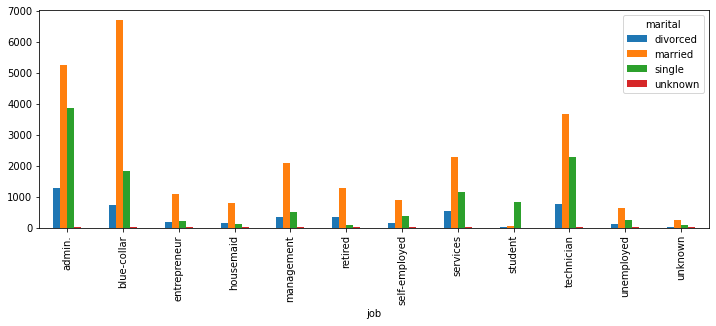

In [139]:
compare1.plot(kind='bar', figsize=(12,4))

- Dimana pada client kita, client yang yang paling banyak dihubungi adalah pekerja admin. Dan kebanyakan client yang sering dihubungi adalah orang yang sudah menikah
- Untuk client yang paling sedikit dihubungi oleh team marketing bank adalah client yang tidak diketahui pekerjaannya dan kebanyakan status pernikahannya itu sudah menikah

In [140]:
compare2 = pd.crosstab(df["job"],df["education"])
compare2

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


<AxesSubplot:xlabel='job'>

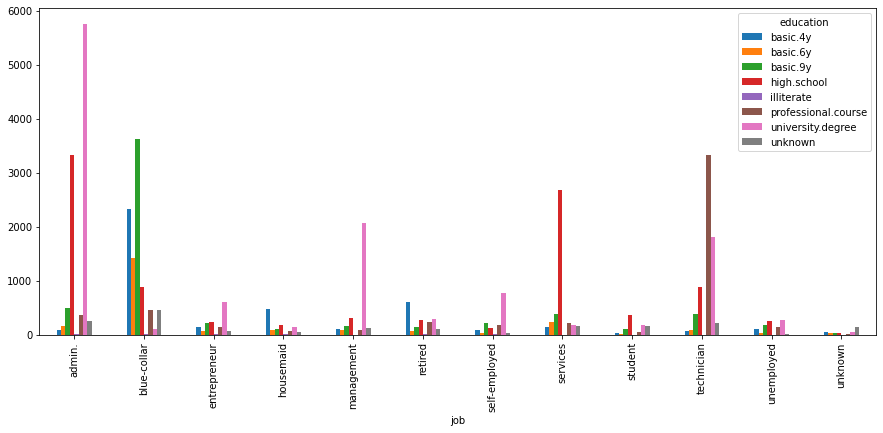

In [141]:
compare2.plot(kind='bar', figsize=(15,6))

- Disini saya ingin membandingkan tingkat edukasi pada setiap client dengan jenis pekerjaannya. Dan bisa dilihat bahwa client dengan pekerjaan admin didominasi oleh orang yang tingkat edukasinya tingkat SMA dan Sarjana
- Dan untuk bidang pekerjaan blue collar (Kantoran) didominasi dengan tingkat edukasi basic.9y (Sekolah elementary, middle school,high school)
- Dan untuk bidang pekerjaan manajemen didominasi oleh orang yang tingat edukasinya adalah sarjana
- Dan untuk bidang pekerjaan services didominasi oleh orang dengan tingkat edukasi highschool
- Sedangkan di bidang pekerjaan technician didominasi oeleh orang dengan tingkat pekerjaan professional course

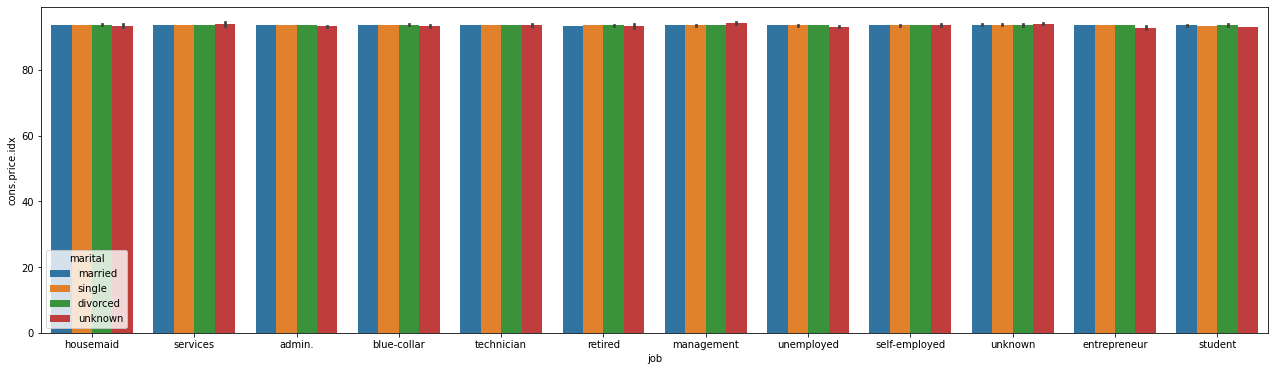

In [142]:
# Melihat Grafik Konsumen Price Index terhadap target pade setiap bidang pekerjaan
f, ax1 = plt.subplots(figsize=(22, 6))
ax1 = sns.barplot(x="job", y="cons.price.idx", hue="marital", data=df)

- Bisa dilihat dari grafik diatas hampir semua orang dengan segala bidang pekerjaan dan status pernikahan memiliki rata-rata daya konsumsi barang kebutuhan yang sama

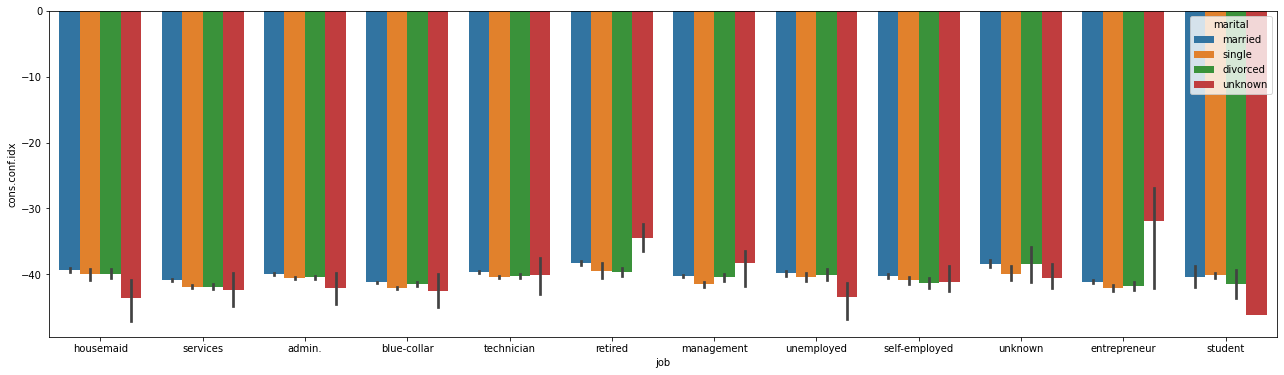

In [143]:
# Melihat Grafik Indeks Kepercayaan Konsumen dengan rentang 1 bulan terhadap target pade setiap bidang pekerjaan
f, ax2 = plt.subplots(figsize=(22, 6))
ax2 = sns.barplot(x="job", y="cons.conf.idx", hue="marital", data=df)

- Bisa dilihat dari grafik diatas hampir semua orang dengan segala bidang pekerjaan dan status pernikahan memiliki rata-rata kepercayaan (Optimisme atau Pesimisme) dalam mengkonsumsi barang kebutuhan, investment, dll. Bisa dilihat pada grafik bahwa pada bidang pekerjaan student, unemployed, dan housemaid yang status pernikahannya tidak diketahui didapatkan kurangnya kepercayaan dalam memkonsumsi barang kebutuhan ataupun investasi bila dikaitkan dalam dataset ini.

- Dan untuk konsumen yang memiliki kepercayaan yang cukup tinggi dalam menginvestasikan tabungannya ada pada konsumen yang status pekerjaannya enterpreneur dan retired/ pensiunan dengan status pernikahan yang tidak diketahui.

In [144]:
# Membandingkan status pernikahan pada setiap umur di dataset
compare3 = pd.crosstab(df["age"],df["marital"])
compare3

marital,divorced,married,single,unknown
age,,,,
17,0,0,5,0
18,0,0,28,0
19,0,0,42,0
20,0,1,64,0
21,0,8,94,0
...,...,...,...,...
91,0,2,0,0
92,1,3,0,0
94,0,1,0,0


In [145]:
# Melihat jumlah orang pada setiap pekerjaan di setiap umur yang ada pada datset
compare4 = pd.crosstab(df["age"],df["job"])
compare4

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,,,,,,,,,,,,
17,0,0,0,0,0,0,0,0,5,0,0,0
18,0,0,0,0,0,0,0,0,28,0,0,0
19,0,0,0,0,0,0,0,0,42,0,0,0
20,1,7,4,0,0,0,0,3,46,4,0,0
21,12,15,0,1,1,0,2,12,54,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,2,0,0,0,0,0,0
92,0,0,0,0,0,4,0,0,0,0,0,0
94,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

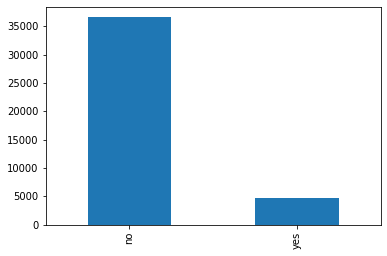

In [146]:
# Membandingkan jumlah label pada target balance atau tidak
df.y.value_counts().plot(kind='bar')

- Dilihat dari tabel, bahwa nilai label pada target di dataset ini tidak balance. Karena pada label 'No' jumlah lebelnya hampir 7 kali lipat dibandingkan dengan label yang bernilai yes

# v. EDA, DATA PREPROCESSING, DATA CLEANING, SCALING

## 1. EDA Dataset

In [147]:
bank_forcast = df.copy()

In [148]:
bank_forcast.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [149]:
# Mengubah nama dibeberapa kolom pada dataset
bank_forcast.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx',
                             'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed', 'y' : 'subcription'}, inplace=True)

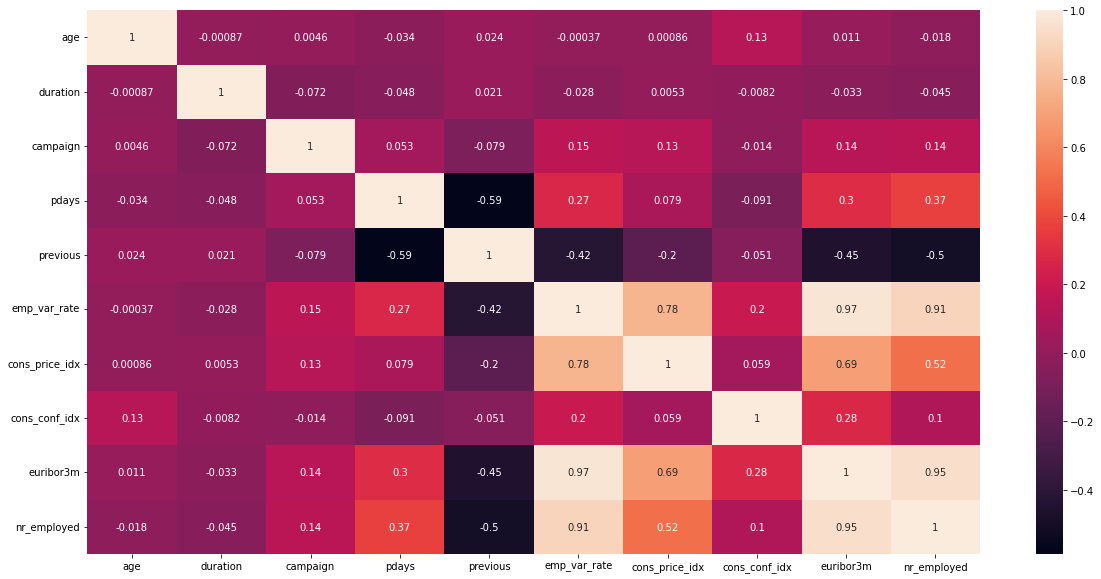

In [150]:
# Membuat plot heatmap untuk melihat korelasi pada feature dengan target
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(bank_forcast.corr(), annot=True,)

- Bisa dilihat korelasi tertinggi antara feature dengan targetnta adalah feature duration setelah itu disusul oleh korelasi negatif  nr_employed dan feature ueribor3m dan pdays

In [151]:
bank_forcast.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'subcription'],
      dtype='object')

In [152]:
# kolom = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
#        'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
#        'cons_conf_idx', 'euribor3m', 'nr_employed']
# dm = bank_forcast[kolom]

In [153]:
# # Menditeksi Multicollinearity menggunakan VIF
# vif_data = pd.DataFrame()
# vif_data["feature"] = dm.columns
  
# # Menghitung VIF pada masing-masing feature
# vif_data["VIF"] = [variance_inflation_factor(dm.values, i)
#                           for i in range(len(dm.columns))]
  
# print(vif_data)

- Dilihat dari hasil penditeksi Multicollinearity menggunakan VIF score, ada beberapa feature yang memiliki korelasi tinggi dengan feature lainnya.
Karena asumsi saya semua data yang nilai vifnya yang tinggi masih besar pengaruhnya dengan target, saya menetapkan untuk tetap menggunakan semua feature untuk di uji lebih lanjut

## 2. Split Data

In [154]:
# Menentukan feature dan target untuk split data
X = bank_forcast.drop('subcription', axis=1)
y = bank_forcast['subcription']

In [155]:
print('Ukuran X : ', X.shape)
print('Ukuran y : ', y.shape)

Ukuran X :  (41188, 20)
Ukuran y :  (41188,)


In [156]:
# Split data train dan data test dengan perbandingan 60% : 40% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y, random_state=38)

In [157]:
# Memasukan fungsi sklearn label encoder

labelencoder = LabelEncoder()
X_train['job'] = labelencoder.fit_transform(X_train['job'])
X_train['marital'] = labelencoder.fit_transform(X_train['marital'])
X_train['education'] = labelencoder.fit_transform(X_train['education'])
X_train['default'] = labelencoder.fit_transform(X_train['default'])
X_train['housing'] = labelencoder.fit_transform(X_train['housing'])
X_train['loan'] = labelencoder.fit_transform(X_train['loan'])
X_train['contact'] = labelencoder.fit_transform(X_train['contact'])
X_train['poutcome'] = labelencoder.fit_transform(X_train['poutcome'])
X_train['day_of_week'] = labelencoder.fit_transform(X_train['day_of_week'])
X_train['month'] = labelencoder.fit_transform(X_train['month'])

In [162]:
y_train = labelencoder.fit_transform(y_train)

KeyError: 'subcription'

- Mengganti label pada kolom dataset yang mengandung data classification

In [ ]:
X_test['job'] = labelencoder.transform(X_test['job'])
X_test['marital'] = labelencoder.transform(X_test['marital'])
X_test['education'] = labelencoder.transform(X_test['education'])
X_test['default'] = labelencoder.transform(X_test['default'])
X_test['housing'] = labelencoder.transform(X_test['housing'])
X_test['loan'] = labelencoder.transform(X_test['loan'])
X_test['contact'] = labelencoder.transform(X_test['contact'])
X_test['poutcome'] = labelencoder.transform(X_test['poutcome'])
X_test['day_of_week'] = labelencoder.transform(X_test['day_of_week'])
X_test['month'] = labelencoder.transform(X_test['month'])

y_test['subcription'] = labelencoder.transform(y_test['subcription'])

## 3. Handle Missing Value

- TIDAK ADA MISSING VALUE

In [ ]:
bank_forcast.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## 4. Handle Outlier

### 4.1 Gambaran Distribusi Sebelum Handling Outlier Pada Kolom Numerical

In [ ]:
# Membuat grafik histogram dan box plot pada feature

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

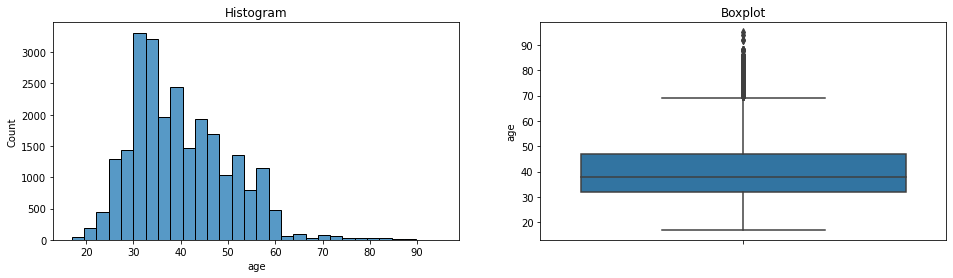


Skewness Value :  0.7759493727112835


In [ ]:
diagnostic_plots(X_train, 'age')
print('\nSkewness Value : ', X_train['age'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature age ini berbentuk skewed positif dan memiliki outlier yang butuh dihandle

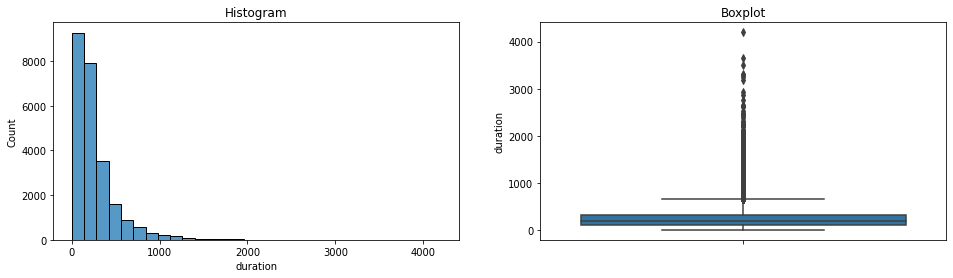


Skewness Value :  3.15565806167224


In [ ]:
diagnostic_plots(X_train, 'duration')
print('\nSkewness Value : ', X_train['duration'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature duration ini berbentuk skewed positif dan memiliki outlier yang butuh dihandle

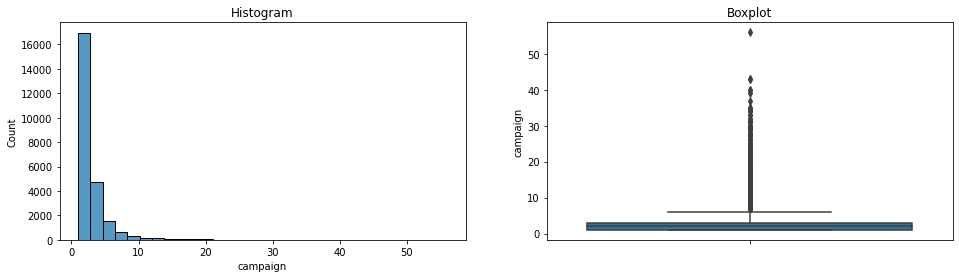


Skewness Value :  4.908943755009387


In [ ]:
diagnostic_plots(X_train, 'campaign')
print('\nSkewness Value : ', X_train['campaign'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature campaign ini berbentuk skewed positif dan memiliki outlier yang butuh dihandle

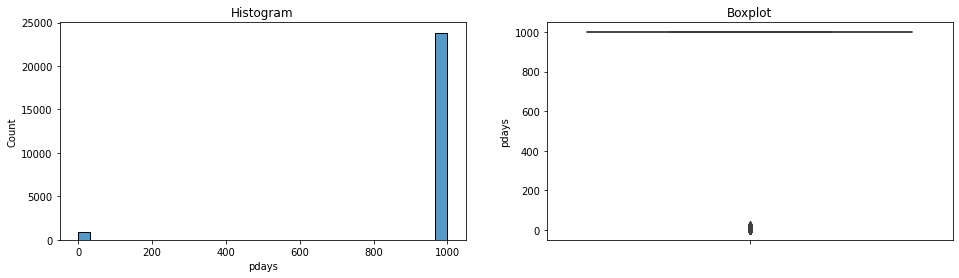


Skewness Value :  -4.993304729879065


In [ ]:
diagnostic_plots(X_train, 'pdays')
print('\nSkewness Value : ', X_train['pdays'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature duration ini berbentuk skewed negatif dan memiliki outlier yang butuh dihandle

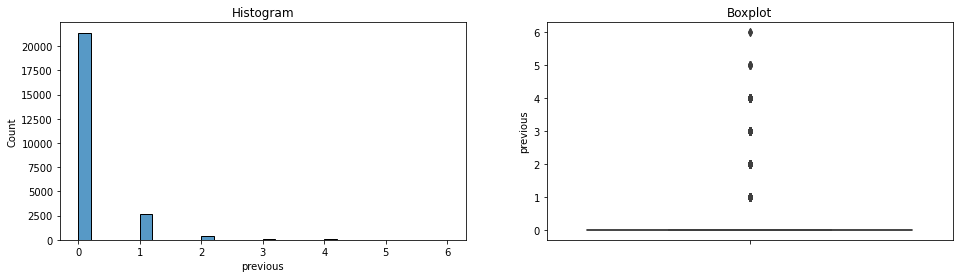


Skewness Value :  3.7724890757442213


In [ ]:
diagnostic_plots(X_train, 'previous')
print('\nSkewness Value : ', X_train['previous'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature previous ini berbentuk skewed positif dan memiliki outlier yang butuh dihandle

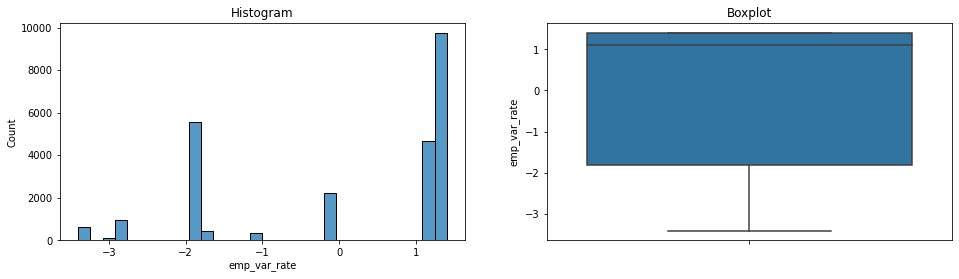


Skewness Value :  -0.7210744687740414


In [ ]:
diagnostic_plots(X_train, 'emp_var_rate')
print('\nSkewness Value : ', X_train['emp_var_rate'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature emp_var_rate ini berbentuk skewed negatif dan tidak memiliki outlier yang harus dihandle

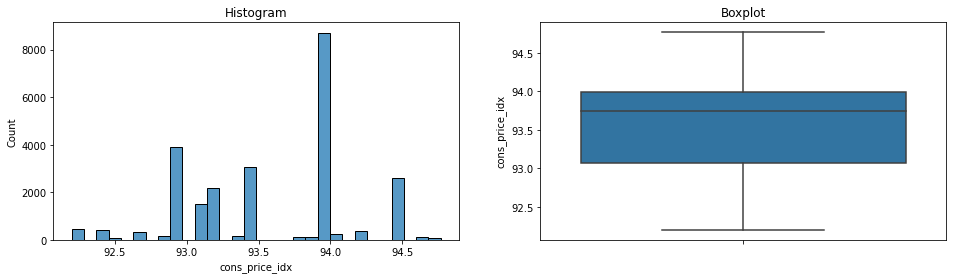


Skewness Value :  -0.2290699020794592


In [ ]:
diagnostic_plots(X_train, 'cons_price_idx')
print('\nSkewness Value : ', X_train['cons_price_idx'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature cons_price_idx ini berbentuk distribusi normal dan tidak memiliki outlier yang harus dihandle

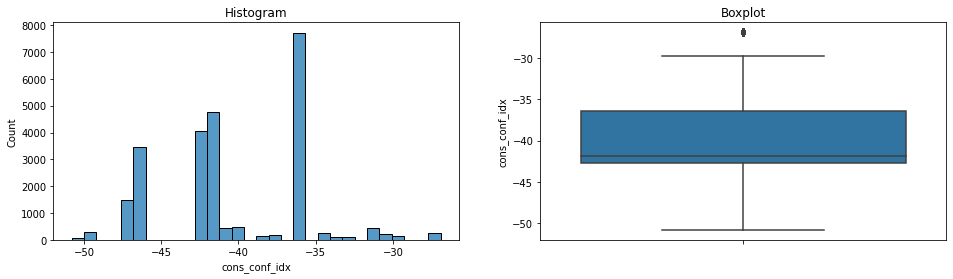


Skewness Value :  0.3120829126595513


In [ ]:
diagnostic_plots(X_train, 'cons_conf_idx')
print('\nSkewness Value : ', X_train['cons_conf_idx'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature cons_price_idx ini berbentuk distribusi normal dan ada beberapa outlier yang butuh dihandle

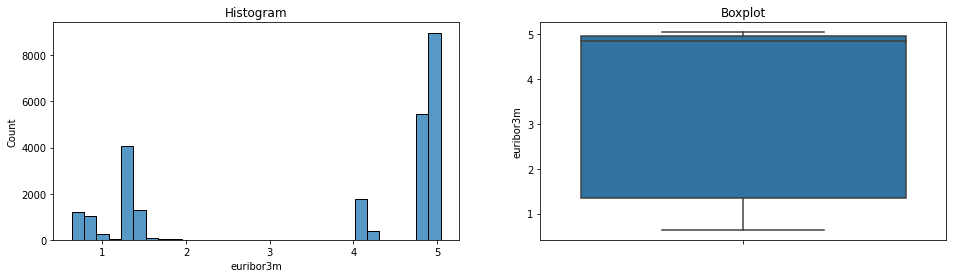


Skewness Value :  -0.7075800159419624


In [ ]:
diagnostic_plots(X_train, 'euribor3m')
print('\nSkewness Value : ', X_train['euribor3m'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature euribor3m ini berbentuk skewed negatif dan tidak ada outlier yang harus dihandle

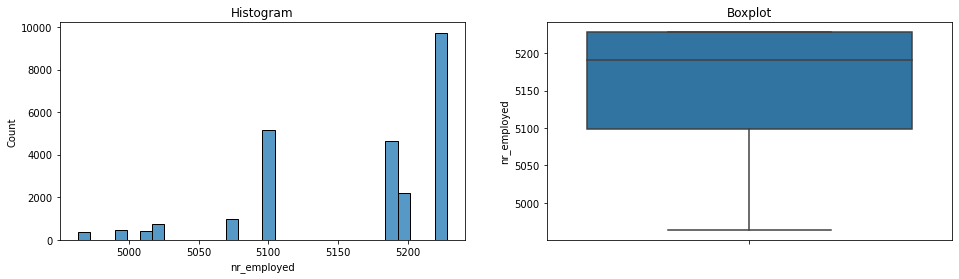


Skewness Value :  -1.0408625644569536


In [ ]:
diagnostic_plots(X_train, 'nr_employed')
print('\nSkewness Value : ', X_train['nr_employed'].skew())

- Dari grafik distribusi dan box plot diatas, menunjukan bahwa bentuk distribusi dari feature nr_employed ini berbentuk skewed negatif dan tidak ada outlier yang harus dihandle

### 4.2 Handle Outlier Feature Sesuai Distribusinya

#### Handling Outlier Feature age (Skewed Positif Distibution)

In [ ]:
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary_age = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_age = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_age, lower_boundary_age

In [ ]:
upper_boundary_age, lower_boundary_age = find_skewed_boundaries(X_train, 'age', 3)
upper_boundary_age, lower_boundary_age

(92.0, -13.0)

In [ ]:
print('Total Data : {}'.format(len(X_train)))
print('(Upper End Outliers)   : {}'.format(len(X_train[X_train['age'] > upper_boundary_age])))
print('')
print('Upper End Outliers Percentage : {}'.format(len(X_train[X_train['age'] > upper_boundary_age])/len(X_train) * 100))

Total Data : 24712
(Upper End Outliers)   : 2

Upper End Outliers Percentage : 0.00809323405632891


In [ ]:
index_drop_train1_up = X_train.index[X_train['age'] > upper_boundary_age]

In [ ]:
X_train = X_train.drop(index_drop_train1_up.tolist())
X_train.shape

(24710, 20)

In [ ]:
y_train = y_train.drop(index_drop_train1_up.tolist())
y_train.shape

(24710,)

#### Handling Outlier Feature duration (Skewed Positif Distibution)

In [ ]:
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary_duration = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_duration = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_duration, lower_boundary_duration

In [ ]:
upper_boundary_duration, lower_boundary_duration = find_skewed_boundaries(X_train, 'duration', 3)
upper_boundary_duration, lower_boundary_duration

(979.0, -554.0)

In [ ]:
print('Total Data : {}'.format(len(X_train)))
print('(Upper End Outliers)   : {}'.format(len(X_train[X_train['duration'] > upper_boundary_duration])))
print('')
print('Upper End Outliers Percentage : {}'.format(len(X_train[X_train['duration'] > upper_boundary_duration])/len(X_train) * 100))

Total Data : 24710
(Upper End Outliers)   : 612

Upper End Outliers Percentage : 2.4767300687980573


In [ ]:
index_drop_train2_up = X_train.index[X_train['duration'] > upper_boundary_duration]

In [ ]:
X_train = X_train.drop(index_drop_train2_up.tolist())
X_train.shape

(24098, 20)

In [ ]:
y_train = y_train.drop(index_drop_train2_up.tolist())
y_train.shape

(24098,)

#### Handling Outlier Feature campaign (Skewed Positif Distibution)

In [ ]:
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary_campaign = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_campaign = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_campaign, lower_boundary_campaign

In [ ]:
upper_boundary_campaign, lower_boundary_campaign = find_skewed_boundaries(X_train, 'campaign', 3)
upper_boundary_campaign, lower_boundary_campaign

(9.0, -5.0)

In [ ]:
print('Total Data : {}'.format(len(X_train)))
print('(Upper End Outliers)   : {}'.format(len(X_train[X_train['campaign'] > upper_boundary_campaign])))
print('')
print('Upper End Outliers Percentage : {}'.format(len(X_train[X_train['campaign'] > upper_boundary_campaign])/len(X_train) * 100))

Total Data : 24098
(Upper End Outliers)   : 616

Upper End Outliers Percentage : 2.5562287326749105


In [ ]:
index_drop_train3_up = X_train.index[X_train['campaign'] > upper_boundary_campaign]

In [ ]:
X_train = X_train.drop(index_drop_train3_up.tolist())
X_train.shape

(23482, 20)

In [ ]:
y_train = y_train.drop(index_drop_train3_up.tolist())
y_train.shape

(23482,)

#### Handling Outlier Feature pdays (Skewed Negatif Distibution)

In [ ]:
def find_skewed_boundaries(X_train, variable, distance):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary_pdays = X_train[variable].quantile(0.25) - (IQR * distance)
    upper_boundary_pdays = X_train[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary_pdays, lower_boundary_pdays

In [ ]:
upper_boundary_pdays, lower_boundary_pdays = find_skewed_boundaries(X_train, 'pdays', 3)
upper_boundary_pdays, lower_boundary_pdays

(999.0, 999.0)

In [ ]:
print('Total Data : {}'.format(len(X_train)))
print('(Upper End Outliers)   : {}'.format(len(X_train[X_train['pdays'] < lower_boundary_pdays])))
print('')
print('Upper End Outliers Percentage : {}'.format(len(X_train[X_train['pdays'] < lower_boundary_pdays])/len(X_train) * 100))

Total Data : 23482
(Upper End Outliers)   : 861

Upper End Outliers Percentage : 3.6666382761263945


In [ ]:
index_drop_train4_up = X_train.index[X_train['pdays'] < lower_boundary_pdays]

In [ ]:
X_train = X_train.drop(index_drop_train4_up.tolist())
X_train.shape

(22621, 20)

In [ ]:
y_train = y_train.drop(index_drop_train4_up.tolist())
y_train.shape

(22621,)

#### Handling Outlier Feature previous (Skewed Positif Distibution)

- OUTLIER TIDAK SAYA HAPUS KARENA ASUMSI SAYA KOLOM 'previous' INI ADALAH SEBUAH FREKUENSI 
- KARENA NILAI-NILAI PADA OUTLIER CUKUP PENTING BUAT PENGOLAHAN DATA

#### Handling Outlier Feature emp_var_rate (Skewed Negatif Distibution)

- TIDAK ADA OUTLIER

#### Handling Outlier Feature cons_price_idx (Normal Distibution)

- TIDAK ADA OUTLIER

#### Handling Outlier Feature cons_conf_idx (Normal Distibution)

In [ ]:
def find_normal_boundaries(X_train, variable):
    upper_boundary_cons_conf_idx = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary_cons_conf_idx = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary_cons_conf_idx, lower_boundary_cons_conf_idx

In [ ]:
upper_boundary_cons_conf_idx, lower_boundary_cons_conf_idx = find_normal_boundaries(X_train, 'cons_conf_idx')
upper_boundary_cons_conf_idx, lower_boundary_cons_conf_idx

(-26.983238512353864, -54.23320638398141)

In [ ]:
print('Total of Data: {}'.format(len(X_train)))
print('(Upper End Outliers) : {}'.format(len(X_train[X_train['cons_conf_idx'] > upper_boundary_cons_conf_idx])))
print('(Lower End Outliers)  : {}'.format(len(X_train[X_train['cons_conf_idx'] < lower_boundary_cons_conf_idx])))
print('')
print('Upper End Outliers Percentage : {}'.format(len(X_train[X_train['cons_conf_idx'] > upper_boundary_cons_conf_idx]) / len(X_train) * 100))
print('Lower End Outliers Percentage : {}'.format(len(X_train[X_train['cons_conf_idx'] < lower_boundary_cons_conf_idx]) / len(X_train) * 100))

Total of Data: 22621
(Upper End Outliers) : 213
(Lower End Outliers)  : 0

Upper End Outliers Percentage : 0.9416029353255825
Lower End Outliers Percentage : 0.0


In [ ]:
index_drop_train5_up = X_train.index[X_train['cons_conf_idx'] > upper_boundary_cons_conf_idx]

In [ ]:
X_train = X_train.drop(index_drop_train5_up.tolist())
X_train.shape

(22408, 20)

In [ ]:
y_train = y_train.drop(index_drop_train5_up.tolist())
y_train.shape

(22408,)

#### Handling Outlier Feature euribor3m (Skewed Negatif Distibution)

- TIDAK ADA OUTLIER

#### Handling Outlier Feature nr_employed (Skewed Negatif Distibution)

- TIDAK ADA OUTLIER

## 5. EDA X_train

In [ ]:
# Mencoba mengecek korelasi menggunakan feature importance pada random forrest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.10720963, 0.05655952, 0.02786253, 0.04879381, 0.01061723,
       0.02370161, 0.01722034, 0.01235041, 0.02158191, 0.04679997,
       0.31679127, 0.04593225, 0.        , 0.01096882, 0.00834855,
       0.02448906, 0.02625088, 0.03203363, 0.10966045, 0.05282813])

In [ ]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

<AxesSubplot:>

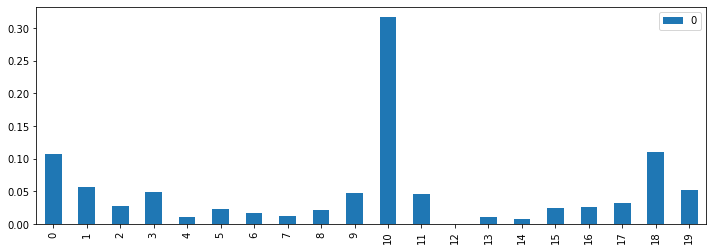

In [ ]:
test_9 = rf.feature_importances_
pd.DataFrame(test_9).plot(kind='bar', figsize=(12,4))

Dilihat dari hasil diatas, feature yang nilai importancenya 0, yaitu pada index 12 yaitu pdays. Sehingga saya memutuskan untuk menghapus feature 'pdays' untuk ketahap evaluasi model

In [ ]:
X_train.drop('pdays', axis=1, inplace=True)

In [ ]:
X_test.drop('pdays', axis=1, inplace=True)

## 6. Scaling

In [ ]:
# Metode scaling menggunakan MinMax Scaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# vi. MODEL DEFINITION

In [ ]:
# Model Definition Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Model Definition Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Model Definition Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Model Definition Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Model Definition KNN (K-Nearest Neighbors)
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Model Definition Gaussian Naive Bayes
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Model Definition Stochastic Gradient Descent
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train, y_train)

SGDClassifier()

# vii. MODEL EVALUATION

## Evaluasi Model

### 1. Evaluasi Model Logistic Regression

In [ ]:
# Evaluasi Model Logistic Regression
y_pred_logreg = logreg.predict(X_test)

y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
[fpr_logreg, tpr_logreg, thr_logreg] = roc_curve(y_test, y_pred_proba_logreg)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_logreg))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_logreg))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr_logreg, tpr_logreg))

idx = np.min(np.where(tpr_logreg > 0.95))

Train/Test split results:
LogisticRegression accuracy is 0.904
LogisticRegression log_loss is 0.227
LogisticRegression auc is 0.929


- Hasil dari evaluasi model yang didapatkan pada model logistic regression adalah nilai akurasi dari model itu 0.904 atau 90.4% dan nilai auc sebesar 0.929 atau 92.9% yang artinya model ini bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 90.4% dan model ini dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 92.9%.

MEMBANDINGKAN HASIL PREDIKSI MODEL LOGISTIC REGRESSION DENGAN NILAI CROSS VALIDATION K-FOLD PADA MODEL

In [ ]:
# Cross Validation K-fold Logistic Regression
scores_accuracy_logreg = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss_logreg = cross_val_score(logreg, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc_logreg = cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_logreg.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss_logreg.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc_logreg.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.928
LogisticRegression average log_loss is 0.174
LogisticRegression average auc is 0.923


- Hasil dari cross validation model yang didapatkan pada model logistic regression adalah nilai akurasi dari model itu 0.928 atau 92.8% dan nilai auc sebesar 0.923 atau 92.93% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 92.8% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 92.93%.

In [ ]:
# Classificationn Report Logistic Regression
y_train_logreg = logreg.predict(X_train)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print('Confusion matrix\n\n', cm_logreg)
print('')
print("Logistic Regression Train\n", classification_report(y_train, y_train_logreg, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_train_logreg, y_train))
print('')
print("Logistic Regression VAL\n", classification_report(y_test, y_pred_logreg, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_pred_logreg, y_test))

Confusion matrix

 [[14150   470]
 [ 1110   746]]

Logistic Regression Train
                precision    recall  f1-score   support

Not Subscribe       0.94      0.98      0.96     20605
    Subscribe       0.61      0.30      0.40      1803

     accuracy                           0.93     22408
    macro avg       0.78      0.64      0.68     22408
 weighted avg       0.91      0.93      0.92     22408

accuracy score : 0.9282399143163156

Logistic Regression VAL
                precision    recall  f1-score   support

Not Subscribe       0.93      0.97      0.95     14620
    Subscribe       0.61      0.40      0.49      1856

     accuracy                           0.90     16476
    macro avg       0.77      0.68      0.72     16476
 weighted avg       0.89      0.90      0.90     16476

accuracy score : 0.9041029376062151


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 92.8% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 90.4%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_logreg, average='weighted'))

f1-score for inbalance label :  0.8951406703125523


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model logistic regression didapatkan nilai f-score sebesar 89.514%

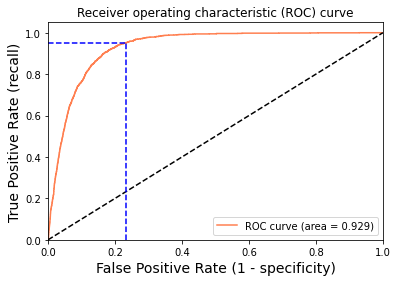

In [ ]:
# Plot grafik Roc Curve Model Logistic Regression

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr_logreg, tpr_logreg))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr_logreg[idx]], [tpr_logreg[idx],tpr_logreg[idx]], 'k--', color='blue')
plt.plot([fpr_logreg[idx],fpr_logreg[idx]], [0,tpr_logreg[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

- Disini bisa dilihat luas area yang didapatkan pada model logistic regression ini sebesar 92.9%, yang dimana dapat diartikan bahwa model ini dapat belajar memprediksi data baru dengan tingkat kebenaran sebesar 92.9%

### 2. Evaluasi Model Support Vector Machine

In [ ]:
y_pred_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
print("Test accuracy score: {:.2f}".format(svm.score(X_test, y_test)))

Test accuracy score: 0.90


Hasil evaluasi dari model svm ini, didapatkan nilai score sebesar 0.90 atau 90% yang dapat diartikan bahwa model ini dapat memprediksi nilai target pada dataset ini sebesar 90%.

MEMBANDINGKAN HASIL PREDIKSI MODEL SUPPORT VECTOR MACHINE DENGAN NILAI CROSS VALIDATION K-FOLD PADA MODEL

In [ ]:
# Cross Validation K-fold Support Vector Machine
scores_accuracy_svm = cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
scores_auc_svm = cross_val_score(svm, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(svm.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_svm.mean())
print(svm.__class__.__name__+" average auc is %2.3f" % scores_auc_svm.mean())

K-fold cross-validation results:
SVC average accuracy is 0.926
SVC average auc is 0.875


- Hasil dari cross validation model yang didapatkan pada model support vector machine adalah nilai akurasi dari model itu 0.926 atau 92.6% dan nilai auc sebesar 0.875 atau 87.5% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 92.6% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 87.5%.

In [ ]:
# Classificationn Report SVM

cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix\n\n', cm_svm)
print('')
print("Support Vector Machine Train\n", classification_report(y_train, y_train_svm, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_train_svm, y_train))
print('')
print("Support Vector Machine VAL\n", classification_report(y_test, y_pred_svm, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_pred_svm, y_test))

Confusion matrix

 [[14482   138]
 [ 1535   321]]

Support Vector Machine Train
                precision    recall  f1-score   support

Not Subscribe       0.93      1.00      0.96     20605
    Subscribe       0.75      0.15      0.25      1803

     accuracy                           0.93     22408
    macro avg       0.84      0.57      0.61     22408
 weighted avg       0.92      0.93      0.90     22408

accuracy score : 0.9275258836129954

Support Vector Machine VAL
                precision    recall  f1-score   support

Not Subscribe       0.90      0.99      0.95     14620
    Subscribe       0.70      0.17      0.28      1856

     accuracy                           0.90     16476
    macro avg       0.80      0.58      0.61     16476
 weighted avg       0.88      0.90      0.87     16476

accuracy score : 0.898458363680505


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 93% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 90%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_svm, average='weighted'))

f1-score for inbalance label :  0.8701354939625944


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model support vector machine didapatkan nilai f-score sebesar 87.013%

### 3. Evaluasi Model Random Forest

In [ ]:
# Evaluasi Model Random Forest
y_pred_rf = clf_rf.predict(X_test)

y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]
[fpr_rf, tpr_rf, thr_rf] = roc_curve(y_test, y_pred_proba_rf)
print('Train/Test split results:')
print(clf_rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_rf))
print(clf_rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf))
print(clf_rf.__class__.__name__+" auc is %2.3f" % auc(fpr_rf, tpr_rf))

idx = np.min(np.where(tpr_rf > 0.95))

Train/Test split results:
RandomForestClassifier accuracy is 0.907
RandomForestClassifier log_loss is 0.194
RandomForestClassifier auc is 0.942


- Hasil dari evaluasi model yang didapatkan pada model random forest adalah nilai akurasi dari model itu 0.907 atau 90.7% dan nilai auc sebesar 0.942 atau 94.2% yang artinya model ini bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 90.7% dan model ini dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 94.2%.

MEMBANDINGKAN HASIL PREDIKSI MODEL RANDOM FOREST DENGAN NILAI CROSS VALIDATION K-FOLD PADA MODEL

In [ ]:
# Cross Validation K-fold Random Forest
scores_accuracy_clf_rf = cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss_clf_rf = cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc_clf_rf = cross_val_score(clf_rf, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(clf_rf.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_clf_rf.mean())
print(clf_rf.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss_clf_rf.mean())
print(clf_rf.__class__.__name__+" average auc is %2.3f" % scores_auc_clf_rf.mean())

K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.928
RandomForestClassifier average log_loss is 0.182
RandomForestClassifier average auc is 0.938


- Hasil dari cross validation model yang didapatkan pada model random forest adalah nilai akurasi dari model itu 0.928 atau 92.8% dan nilai auc sebesar 0.938 atau 93.8% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 92.8% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 93.8%.

In [ ]:
# Classification Report Model Random Forest

y_train_rf = clf_rf.predict(X_train)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cm_rf)
print('')
print("Random Forest Train\n", classification_report(y_train, y_train_rf, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score( y_train_rf, y_train))
print('')
print("Random Forest\n", classification_report(y_test, y_pred_rf, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score( y_pred_rf, y_test))

Confusion matrix

 [[14202   418]
 [ 1109   747]]

Random Forest Train
                precision    recall  f1-score   support

Not Subscribe       1.00      1.00      1.00     20605
    Subscribe       1.00      1.00      1.00      1803

     accuracy                           1.00     22408
    macro avg       1.00      1.00      1.00     22408
 weighted avg       1.00      1.00      1.00     22408

accuracy score : 1.0

Random Forest
                precision    recall  f1-score   support

Not Subscribe       0.93      0.97      0.95     14620
    Subscribe       0.64      0.40      0.49      1856

     accuracy                           0.91     16476
    macro avg       0.78      0.69      0.72     16476
 weighted avg       0.90      0.91      0.90     16476

accuracy score : 0.907319737800437


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 100% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 91%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_rf, average='weighted'))

f1-score for inbalance label :  0.8977900855920212


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model random forest didapatkan nilai f-score sebesar 89.778%

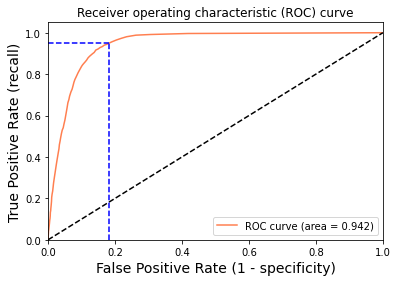

In [ ]:
# Grafik Roc Curve Model Random Forest

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr_rf, tpr_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr_rf[idx]], [tpr_rf[idx],tpr_rf[idx]], 'k--', color='blue')
plt.plot([fpr_rf[idx],fpr_rf[idx]], [0,tpr_rf[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

- Disini bisa dilihat luas area yang didapatkan pada model Random Forest ini sebesar 94.2%, yang dimana dapat diartikan bahwa model ini dapat belajar memprediksi data baru dengan tingkat kebenaran sebesar 94.2%

### 4. Evaluasi Model Decision Tree

In [ ]:
# Evaluasi Model Decision Tree
y_pred_dt = dt.predict(X_test)

y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
[fpr_dt, tpr_dt, thr_dt] = roc_curve(y_test, y_pred_proba_dt)
print('Train/Test split results:')
print(dt.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_dt))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_dt))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr_dt, tpr_dt))

idx = np.min(np.where(tpr_dt > 0.95))

Train/Test split results:
DecisionTreeClassifier accuracy is 0.887
DecisionTreeClassifier log_loss is 3.916
DecisionTreeClassifier auc is 0.708


- Hasil dari evaluasi model yang didapatkan pada model decision tree adalah nilai akurasi dari model itu 0.887 atau 88.7% dan nilai auc sebesar 0.708 atau 70.8% yang artinya model ini bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 88.7% dan model ini dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 70.8%.

MEMBANDINGKAN HASIL PREDIKSI MODEL DECISION TREE DENGAN NILAI CROSS VALIDATION K-FOLD PADA MODEL

In [ ]:
# Cross Validation K-fold Decision Tree
scores_accuracy_dt = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss_dt = cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc_dt = cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(dt.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_dt.mean())
print(dt.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss_dt.mean())
print(dt.__class__.__name__+" average auc is %2.3f" % scores_auc_dt.mean())

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.907
DecisionTreeClassifier average log_loss is 3.226
DecisionTreeClassifier average auc is 0.695


- Hasil dari cross validation model yang didapatkan pada model decision tree adalah nilai akurasi dari model itu 0.907 atau 90.7% dan nilai auc sebesar 0.695 atau 69.5% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 90.7% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 69.5%.

In [ ]:
# Classification Report Model Decision Tree
y_train_dt = dt.predict(X_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion matrix\n\n', cm_dt)
print('')
print("Decision Tree Train\n", classification_report(y_train, y_train_dt, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score( y_train_dt, y_train))
print('')
print("Decision Tree VAL\n", classification_report(y_test, y_pred_dt, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score( y_pred_dt, y_test))

Confusion matrix

 [[13722   898]
 [  970   886]]

Decision Tree Train
                precision    recall  f1-score   support

Not Subscribe       1.00      1.00      1.00     20605
    Subscribe       1.00      1.00      1.00      1803

     accuracy                           1.00     22408
    macro avg       1.00      1.00      1.00     22408
 weighted avg       1.00      1.00      1.00     22408

accuracy score : 1.0

Decision Tree VAL
                precision    recall  f1-score   support

Not Subscribe       0.93      0.94      0.94     14620
    Subscribe       0.50      0.48      0.49      1856

     accuracy                           0.89     16476
    macro avg       0.72      0.71      0.71     16476
 weighted avg       0.88      0.89      0.89     16476

accuracy score : 0.8866229667394999


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 100% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 89%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_dt, average='weighted'))

f1-score for inbalance label :  0.8856409012320389


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model decision tree didapatkan nilai f-score sebesar 88.564%

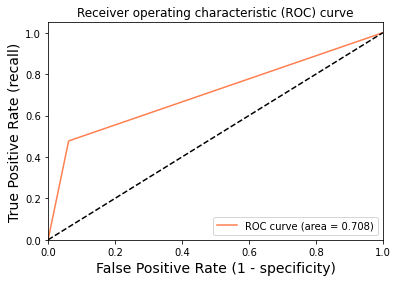

In [ ]:
# Grafik ROC Curve pada model Decision Tree

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr_dt, tpr_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

- Disini bisa dilihat luas area yang didapatkan pada model Decision Tree ini sebesar 70.8%, yang dimana dapat diartikan bahwa model ini dapat belajar memprediksi data baru dengan tingkat kebenaran sebesar 70.8%

### 5. Evaluasi Model KNN (K-Nearest Neighbors)

In [ ]:
# Evaluasi Model KNN
y_pred_neigh = neigh.predict(X_test)

y_pred_proba_neigh = neigh.predict_proba(X_test)[:, 1]
[fpr_neigh, tpr_neigh, thr_neigh] = roc_curve(y_test, y_pred_proba_neigh)
print('Train/Test split results:')
print(neigh.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_neigh))
print(neigh.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_neigh))
print(neigh.__class__.__name__+" auc is %2.3f" % auc(fpr_neigh, tpr_neigh))

idx = np.min(np.where(tpr_neigh > 0.95))

Train/Test split results:
KNeighborsClassifier accuracy is 0.895
KNeighborsClassifier log_loss is 0.948
KNeighborsClassifier auc is 0.837


- Hasil dari evaluasi model yang didapatkan pada model KNN adalah nilai akurasi dari model itu 0.895 atau 89.5% dan nilai auc sebesar 0.837 atau 83.7% yang artinya model ini bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 89.5% dan model ini dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 83.7%.

MEMBANDINGKAN HASIL PREDIKSI MODEL K-NEAREST NEIGHBORS DENGAN NILAI CROSS VALIDATION K-FOLD PADA MODEL

In [ ]:
# Cross Validation K-fold K-Nearest Neighbors
scores_accuracy_neigh = cross_val_score(neigh, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss_neigh = cross_val_score(neigh, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc_neigh = cross_val_score(neigh, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(neigh.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_neigh.mean())
print(neigh.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss_neigh.mean())
print(neigh.__class__.__name__+" average auc is %2.3f" % scores_auc_neigh.mean())

K-fold cross-validation results:
KNeighborsClassifier average accuracy is 0.920
KNeighborsClassifier average log_loss is 0.914
KNeighborsClassifier average auc is 0.803


- Hasil dari cross validation model yang didapatkan pada model KNN adalah nilai akurasi dari model itu 0.920 atau 92% dan nilai auc sebesar 0.803 atau 80.3% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 92% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 80.3%.

In [ ]:
# Classification Report Model KNN
y_train_neigh = neigh.predict(X_train)

cm_neigh = confusion_matrix(y_test, y_pred_neigh)
print('Confusion matrix\n\n', cm_neigh)
print('')
print("K-Nearest Neighbors Train\n", classification_report(y_train, y_train_neigh, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_train_neigh, y_train))
print('')
print("K-Nearest Neighbors VAL\n", classification_report(y_test, y_pred_neigh, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_pred_neigh, y_test))

Confusion matrix

 [[14229   391]
 [ 1344   512]]

K-Nearest Neighbors Train
                precision    recall  f1-score   support

Not Subscribe       0.95      0.99      0.97     20605
    Subscribe       0.75      0.36      0.48      1803

     accuracy                           0.94     22408
    macro avg       0.85      0.67      0.73     22408
 weighted avg       0.93      0.94      0.93     22408

accuracy score : 0.9387718671902892

K-Nearest Neighbors VAL
                precision    recall  f1-score   support

Not Subscribe       0.91      0.97      0.94     14620
    Subscribe       0.57      0.28      0.37      1856

     accuracy                           0.89     16476
    macro avg       0.74      0.62      0.66     16476
 weighted avg       0.87      0.89      0.88     16476

accuracy score : 0.8946953143966982


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 94% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 89%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_neigh, average='weighted'))

f1-score for inbalance label :  0.8781703030015796


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model KNN didapatkan nilai f-score sebesar 87.817%

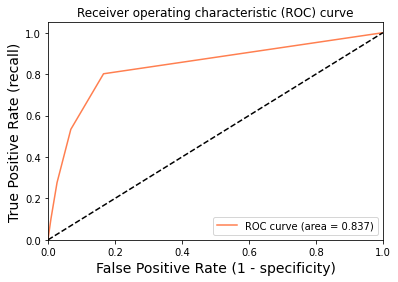

In [ ]:
# Grafik ROC Curve Model KNN

plt.figure()
plt.plot(fpr_neigh, tpr_neigh, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr_neigh, tpr_neigh))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

- Disini bisa dilihat luas area yang didapatkan pada model KNN ini sebesar 83.7%, yang dimana dapat diartikan bahwa model ini dapat belajar memprediksi data baru dengan tingkat kebenaran sebesar 83.7%

### 6. Evaluasi Model Gaussian Naive Bayes

In [ ]:
# Evaluasi Model Gaussian Naive Bayes
y_pred_gauss_nb = gauss_nb.predict(X_test)

y_pred_proba_gauss_nb = gauss_nb.predict_proba(X_test)[:, 1]
[fpr_gauss_nb, tpr_gauss_nb, thr_gauss_nb] = roc_curve(y_test, y_pred_proba_gauss_nb)
print('Train/Test split results:')
print(gauss_nb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_gauss_nb))
print(gauss_nb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_gauss_nb))
print(gauss_nb.__class__.__name__+" auc is %2.3f" % auc(fpr_gauss_nb, tpr_gauss_nb))

idx = np.min(np.where(tpr_gauss_nb > 0.95))

Train/Test split results:
GaussianNB accuracy is 0.808
GaussianNB log_loss is 0.917
GaussianNB auc is 0.877


- Hasil dari evaluasi model yang didapatkan pada model Gaussian Naive Bayes adalah nilai akurasi dari model itu 0.808 atau 80.8% dan nilai auc sebesar 0.877 atau 87.7% yang artinya model ini bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 80.8% dan model ini dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 87.7%.

MEMBANDINGKAN HASIL PREDIKSI MODEL GAUSSIAN NAIVE BAYES DENGAN NILAI CROSS VALIDATION K-FOLD PADA MODEL

In [ ]:
# Cross Validation K-fold Gaussian Naive Bayes
scores_accuracy_gauss_nb = cross_val_score(gauss_nb, X_train, y_train, cv=10, scoring='accuracy')
scores_log_loss_gauss_nb = cross_val_score(gauss_nb, X_train, y_train, cv=10, scoring='neg_log_loss')
scores_auc_gauss_nb = cross_val_score(gauss_nb, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(gauss_nb.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_gauss_nb.mean())
print(gauss_nb.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss_gauss_nb.mean())
print(gauss_nb.__class__.__name__+" average auc is %2.3f" % scores_auc_gauss_nb.mean())

K-fold cross-validation results:
GaussianNB average accuracy is 0.824
GaussianNB average log_loss is 0.675
GaussianNB average auc is 0.847


- Hasil dari cross validation model yang didapatkan pada model gaussian naive bayes adalah nilai akurasi dari model itu 0.824 atau 82.4% dan nilai auc sebesar 0.847 atau 84.7% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 82.4% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 84.7%.

In [ ]:
# Classification Report Model Gaussian Naive Bayes
y_train_gauss_nb = gauss_nb.predict(X_train)

cm_gauss_nb = confusion_matrix(y_test, y_pred_gauss_nb)
print('Confusion matrix\n\n', cm_gauss_nb)
print('')
print("Gaussian Naive Bayes Train\n", classification_report(y_train, y_train_gauss_nb, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_train_gauss_nb, y_train))
print('')
print("Gaussian Naive Bayes VAL\n", classification_report(y_test, y_pred_gauss_nb, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_pred_gauss_nb, y_test))

Confusion matrix

 [[11819  2801]
 [  363  1493]]

Gaussian Naive Bayes Train
                precision    recall  f1-score   support

Not Subscribe       0.97      0.84      0.90     20605
    Subscribe       0.27      0.68      0.38      1803

     accuracy                           0.82     22408
    macro avg       0.62      0.76      0.64     22408
 weighted avg       0.91      0.82      0.86     22408

accuracy score : 0.8237682970367726

Gaussian Naive Bayes VAL
                precision    recall  f1-score   support

Not Subscribe       0.97      0.81      0.88     14620
    Subscribe       0.35      0.80      0.49      1856

     accuracy                           0.81     16476
    macro avg       0.66      0.81      0.68     16476
 weighted avg       0.90      0.81      0.84     16476

accuracy score : 0.8079630978392813


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 82% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 81%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_gauss_nb, average='weighted'))

f1-score for inbalance label :  0.8372928366105832


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model gaussian naive bayes didapatkan nilai f-score sebesar 83.729%

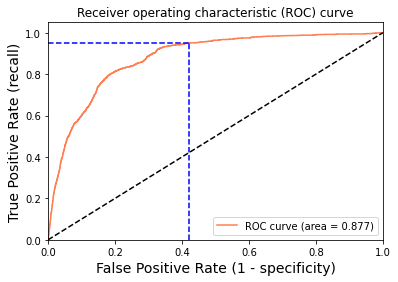

In [ ]:
# Grafik ROC Curve Model Gaussian Naive Bayes

plt.figure()
plt.plot(fpr_gauss_nb, tpr_gauss_nb, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr_gauss_nb, tpr_gauss_nb))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr_gauss_nb[idx]], [tpr_gauss_nb[idx],tpr_gauss_nb[idx]], 'k--', color='blue')
plt.plot([fpr_gauss_nb[idx],fpr_gauss_nb[idx]], [0,tpr_gauss_nb[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

- Disini bisa dilihat luas area yang didapatkan pada model gaussian naive bayes ini sebesar 87.7%, yang dimana dapat diartikan bahwa model ini dapat belajar memprediksi data baru dengan tingkat kebenaran sebesar 87.7%

### 7. Evaluasi Model Stochastic Gradient Descent

In [ ]:
y_pred_clf_sgd = clf_sgd.predict(X_test)

In [ ]:
print(clf_sgd.__class__.__name__+" score is " , (clf_sgd.score(X_test, y_test)))

SGDClassifier score is  0.8992473901432386


Hasil evaluasi dari model stochastic gradient decent ini, didapatkan nilai score sebesar 0.8992 atau 90% yang dapat diartikan bahwa model ini dapat memprediksi nilai target pada dataset ini sebesar 90%.


In [ ]:
# Cross Validation K-fold Stochastic Gradient Descent
scores_accuracy_clf_sgd = cross_val_score(clf_sgd, X_train, y_train, cv=10, scoring='accuracy')
scores_auc_clf_sgd = cross_val_score(clf_sgd, X_train, y_train, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(clf_sgd.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy_clf_sgd.mean())
print(clf_sgd.__class__.__name__+" average auc is %2.3f" % scores_auc_clf_sgd.mean())

K-fold cross-validation results:
SGDClassifier average accuracy is 0.923
SGDClassifier average auc is 0.917


- Hasil dari cross validation model yang didapatkan pada model stochastic gradient decent adalah nilai akurasi dari model itu 0.923 atau 92.3% dan nilai auc sebesar 0.917 atau 91.7% yang artinya model ini seharusnya bisa mempredikasi nilai target dengan benar dari feature yang ada dengan rate kebenaran sebesar 92.3% dan model ini seharusnya dapat mempelajari prediksi data baru dengan rate kebenaran sebesar 91.7%.

In [ ]:
# Classification Report Model Stochastic Gradient Descent
y_train_clf_sgd = clf_sgd.predict(X_train)

cm_clf_sgd = confusion_matrix(y_test, y_pred_clf_sgd)
print('Confusion matrix\n\n', cm_clf_sgd)
print('')
print("Stochastic Gradient Descent Train\n", classification_report(y_train, y_train_clf_sgd, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_train_clf_sgd, y_train))
print('')
print("Stochastic Gradient Descent VAL\n", classification_report(y_test, y_pred_clf_sgd, target_names=["Not Subscribe", "Subscribe"]))
print('accuracy score :', accuracy_score(y_pred_clf_sgd, y_test))

Confusion matrix

 [[14376   244]
 [ 1416   440]]

Stochastic Gradient Descent Train
                precision    recall  f1-score   support

Not Subscribe       0.93      0.99      0.96     20605
    Subscribe       0.67      0.13      0.22      1803

     accuracy                           0.92     22408
    macro avg       0.80      0.56      0.59     22408
 weighted avg       0.91      0.92      0.90     22408

accuracy score : 0.9248482684755445

Stochastic Gradient Descent VAL
                precision    recall  f1-score   support

Not Subscribe       0.91      0.98      0.95     14620
    Subscribe       0.64      0.24      0.35      1856

     accuracy                           0.90     16476
    macro avg       0.78      0.61      0.65     16476
 weighted avg       0.88      0.90      0.88     16476

accuracy score : 0.8992473901432386


- Dari hasil classification report diatas, didapatkan nilai akurasi pada train sebesar 92% dan pada saat di test nilai akurasi didapatkan nilai akurasi sebesar 90%. Yang dimana pada kasus ini nilai akurasi train lebih besar daripada test, bisa disebut juga Overfitting

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_clf_sgd, average='weighted'))

f1-score for inbalance label :  0.8779442631817305


- Karena pada dataset ini, label pada target inbalance jadi saya memutuskan untuk perbandingan antar model nanti menggunakan nilai f1 score dari semua labelnya. Dan dari model stochastic gradient decent didapatkan nilai f-score sebesar 87.794%

## Perbandingan Hasil Akurasi Pada Setiap Model

Membandingkan nilai akurasi pada setiap model

In [ ]:
print(logreg.__class__.__name__+" accuracy = %2.3f" % accuracy_score(y_test, y_pred_logreg))
print(svm.__class__.__name__+" accuracy =" , (svm.score(X_test, y_test)))
print(clf_rf.__class__.__name__+" accuracy = %2.3f" % accuracy_score(y_test, y_pred_rf))
print(dt.__class__.__name__+" accuracy = %2.3f" % accuracy_score(y_test, y_pred_dt))
print(neigh.__class__.__name__+" accuracy = %2.3f" % accuracy_score(y_test, y_pred_neigh))
print(gauss_nb.__class__.__name__+" accuracy = %2.3f" % accuracy_score(y_test, y_pred_gauss_nb))
print(clf_sgd.__class__.__name__+" accuracy =" , (clf_sgd.score(X_test, y_test)))


LogisticRegression accuracy = 0.904
SVC accuracy = 0.898458363680505
RandomForestClassifier accuracy = 0.907
DecisionTreeClassifier accuracy = 0.887
KNeighborsClassifier accuracy = 0.895
GaussianNB accuracy = 0.808
SGDClassifier accuracy = 0.8992473901432386


- Dari hasil nilai akurasi pada setiap model diatas, bisa dilihat ada dua model tertinggi akurasinya diantara model-model lainnya. yaitu model logistic regression dan model random forest. Tetapi pada kesempatan ini saya hanya mengambil satu model dengan nilai akurasi tertinggi saja yang akan saya lanjutkan untuk di tuning parameternya, yaitu model random forest

Karena Data Pada Target Labelnya Inbalance, Jadi Saya Memutuskan Untuk Melihat Perbandingan F1-Score Rata-Rata Setiap Kelasnya

In [ ]:
print('f1-score from Logistic Regression : ', f1_score(y_test, y_pred_logreg, average='weighted'))
print('f1-score from Support Vector Machine : ', f1_score(y_test, y_pred_svm, average='weighted'))
print('f1-score from RandomForestClassifier : ', f1_score(y_test, y_pred_rf, average='weighted'))
print('f1-score from DecisionTreeClassifier : ', f1_score(y_test, y_pred_dt, average='weighted'))
print('f1-score from KNeighborsClassifier : ', f1_score(y_test, y_pred_neigh, average='weighted'))
print('f1-score from GaussianNB : ', f1_score(y_test, y_pred_gauss_nb, average='weighted'))
print('f1-score from SGDClassifier : ', f1_score(y_test, y_pred_clf_sgd, average='weighted'))

f1-score from Logistic Regression :  0.8951406703125523
f1-score from Support Vector Machine :  0.8701354939625944
f1-score from RandomForestClassifier :  0.8977900855920212
f1-score from DecisionTreeClassifier :  0.8856409012320389
f1-score from KNeighborsClassifier :  0.8781703030015796
f1-score from GaussianNB :  0.8372928366105832
f1-score from SGDClassifier :  0.8779442631817305


- Tetapi karena datanya tidak balance kita bisa melihat nilai score f1 semua label dari semua model yang ada. Karena asumsi saya kurang baik jika kita hanya melihat nilai akurasi ketika dataset yang ada inbalance. Jadi saya memilih 1 model dengan nilai score f1 semua label tertinggi yaitu model random forest dan kebetulan pada saat dibandingkan dengan nilai akurasi, model random forest adalah model dengan akurasi tertinggi dibandingkan dengan model lain yang ada pada dataset ini.

## Fine Tuning Parameter Model Terpilih

In [ ]:
# Test Manual Search
manual_search = RandomForestClassifier(n_estimators=400,
                                 criterion='entropy',
                                 max_features='sqrt',
                                 min_samples_leaf=10)
manual_search.fit(X_train, y_train)
y_pred_man_search = manual_search.predict(X_test)
print(confusion_matrix(y_pred_man_search, y_test))
print(classification_report(y_pred_man_search,y_test))
print(accuracy_score(y_pred_man_search, y_test))

[[14380  1288]
 [  240   568]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     15668
           1       0.31      0.70      0.43       808

    accuracy                           0.91     16476
   macro avg       0.64      0.81      0.69     16476
weighted avg       0.95      0.91      0.92     16476

0.9072590434571498


- Pada model random forest dan parameter ditunning dengan manual search didapatkan nilai akurasi sebesar 90.726%, yang nantinya akan di bandingkan dengan model yang tunning parameternya menggunakan default, grid search, dan random search

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test, y_pred_man_search, average='weighted'))

f1-score for inbalance label :  0.8906216760955479


- Didapatkan nilai f1-score semua label sebesar 89.062% pada tunning parameter manual search, dan nantinya dibandingkan dengan model random forest dengan tunningan parameter lainnya.

In [ ]:
# Test Menggunakan Random Search

n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num = 6)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 500, 6)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 6]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [100, 180, 260, 340, 420, 500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 108, 206, 304, 402, 500],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4, 6],
 'criterion': ['entropy', 'gini']}

In [ ]:
clf_rf_randomcv = RandomizedSearchCV(estimator=clf_rf, param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, random_state=46, n_jobs=-1, verbose=2)
clf_rf_randomcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 108, 206, 304, 402,
                                                      500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 180, 260, 340,
                                                         420, 500]},
                   random_state=46, verbose=2)

In [ ]:
clf_rf_randomcv.best_params_

{'n_estimators': 180,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 206,
 'criterion': 'gini'}

In [ ]:
clf_rf_best_random = clf_rf_randomcv.best_estimator_

In [ ]:
y_pred_clf_rfrndm = clf_rf_best_random.predict(X_test)
print(confusion_matrix(y_pred_clf_rfrndm, y_test))
print(classification_report(y_pred_clf_rfrndm,y_test, target_names=["Not Subscribe", "Subscribe"]))
print(accuracy_score(y_pred_clf_rfrndm, y_test))

[[14317  1209]
 [  303   647]]
               precision    recall  f1-score   support

Not Subscribe       0.98      0.92      0.95     15526
    Subscribe       0.35      0.68      0.46       950

     accuracy                           0.91     16476
    macro avg       0.66      0.80      0.71     16476
 weighted avg       0.94      0.91      0.92     16476

0.9082301529497451


- Pada model random forest dan parameter ditunning dengan random search didapatkan nilai akurasi sebesar 90.823%, yang nantinya akan di bandingkan dengan model yang tunning parameternya menggunakan default, grid search, dan manual search

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test,y_pred_clf_rfrndm, average='weighted'))

f1-score for inbalance label :  0.8947938632645317


- Didapatkan nilai f1-score semua label sebesar 89.479% pada tunning parameter random search, dan nantinya dibandingkan dengan model random forest dengan tunningan parameter lainnya.

In [ ]:
# Test Menggunakan Grid Search

param_grid = {
    'criterion': [clf_rf_randomcv.best_params_['criterion']],
    'max_depth': [clf_rf_randomcv.best_params_['max_depth']],
    'max_features': [clf_rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [clf_rf_randomcv.best_params_['min_samples_leaf']-2,
                         clf_rf_randomcv.best_params_['min_samples_leaf'],
                         clf_rf_randomcv.best_params_['min_samples_leaf']+3, 
                         clf_rf_randomcv.best_params_['min_samples_leaf']+5],
    'min_samples_split': [clf_rf_randomcv.best_params_['min_samples_split']-7,
                          clf_rf_randomcv.best_params_['min_samples_split']-5,
                          clf_rf_randomcv.best_params_['min_samples_split']-2, 
                          clf_rf_randomcv.best_params_['min_samples_split'],
                          clf_rf_randomcv.best_params_['min_samples_split']+3],
    'n_estimators': [clf_rf_randomcv.best_params_['n_estimators']-50,
                     clf_rf_randomcv.best_params_['n_estimators'],
                     clf_rf_randomcv.best_params_['n_estimators']+100,
                     clf_rf_randomcv.best_params_['n_estimators']+250,
                     clf_rf_randomcv.best_params_['n_estimators']+380,
                     clf_rf_randomcv.best_params_['n_estimators']+490]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [206], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 9, 11], 'min_samples_split': [3, 5, 8, 10, 13], 'n_estimators': [130, 180, 280, 430, 560, 670]}


In [ ]:
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [206],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 9, 11],
                         'min_samples_split': [3, 5, 8, 10, 13],
                         'n_estimators': [130, 180, 280, 430, 560, 670]},
             verbose=2)

In [ ]:
clf_rf_best_grid = grid_search.best_estimator_

In [ ]:
clf_rf_best_grid

RandomForestClassifier(max_depth=206, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=670)

In [ ]:
y_pred_clf_best_grid = clf_rf_best_grid.predict(X_test)
print(confusion_matrix(y_pred_clf_best_grid, y_test))
print(classification_report(y_pred_clf_best_grid,y_test))
print(accuracy_score(y_pred_clf_best_grid, y_test))

[[14310  1209]
 [  310   647]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     15519
           1       0.35      0.68      0.46       957

    accuracy                           0.91     16476
   macro avg       0.66      0.80      0.70     16476
weighted avg       0.94      0.91      0.92     16476

0.9078052925467347


- Pada model random forest dan parameter ditunning dengan grid search didapatkan nilai akurasi sebesar 90.780%, yang nantinya akan di bandingkan dengan model yang tunning parameternya menggunakan default, manual search, dan random search

In [ ]:
print('f1-score for inbalance label : ', f1_score(y_test,y_pred_clf_best_grid, average='weighted'))

f1-score for inbalance label :  0.894448161711374


- Didapatkan nilai f1-score semua label sebesar 89.445% pada tunning parameter grid search, dan nantinya dibandingkan dengan model random forest dengan tunningan parameter lainnya.

## Perbandingan Model Random Forest dengan Parameter Default, Manual Search, Grid Search, dan Random Search

In [ ]:
# Model Random Forest Default
y_pred_rf = clf_rf.predict(X_test)

y_pred_proba_rf = clf_rf.predict_proba(X_test)[:, 1]
[fpr_rf, tpr_rf, thr_rf] = roc_curve(y_test, y_pred_proba_rf)
print('Train/Test split results:')
print(clf_rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_rf))
print(clf_rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf))
print(clf_rf.__class__.__name__+" auc is %2.3f" % auc(fpr_rf, tpr_rf))

idx = np.min(np.where(tpr_rf > 0.95))

Train/Test split results:
RandomForestClassifier accuracy is 0.907
RandomForestClassifier log_loss is 0.194
RandomForestClassifier auc is 0.942


In [ ]:
# Model Random Forest Manual Search
y_pred_man_search = manual_search.predict(X_test)

y_pred_proba_man_search = manual_search.predict_proba(X_test)[:, 1]
[fpr_rf_man_search, tpr_rf_man_search, thr_rf_man_search] = roc_curve(y_test, y_pred_proba_man_search)
print('Train/Test split results:')
print(clf_rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_man_search))
print(clf_rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_man_search))
print(clf_rf.__class__.__name__+" auc is %2.3f" % auc(fpr_rf_man_search, tpr_rf_man_search))

idx = np.min(np.where(tpr_rf_man_search > 0.95))

Train/Test split results:
RandomForestClassifier accuracy is 0.907
RandomForestClassifier log_loss is 0.181
RandomForestClassifier auc is 0.947


In [ ]:
# Model Random Forest Random Search
y_pred_clf_rfrndm = clf_rf_best_random.predict(X_test)

y_pred_proba_rf_rfrndm = clf_rf_best_random.predict_proba(X_test)[:, 1]
[fpr_rf_rfrndm, tpr_rf_rfrndm, thr_rf_rfrndm] = roc_curve(y_test, y_pred_proba_rf_rfrndm)
print('Train/Test split results:')
print(clf_rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_clf_rfrndm))
print(clf_rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf_rfrndm))
print(clf_rf.__class__.__name__+" auc is %2.3f" % auc(fpr_rf_rfrndm, tpr_rf_rfrndm))

idx = np.min(np.where(tpr_rf_rfrndm > 0.95))

Train/Test split results:
RandomForestClassifier accuracy is 0.908
RandomForestClassifier log_loss is 0.181
RandomForestClassifier auc is 0.946


In [ ]:
# Model Random Forest Grid Search
y_pred_rf_best_grid = clf_rf_best_grid.predict(X_test)

y_pred_proba_rf_best_grid = clf_rf_best_grid.predict_proba(X_test)[:, 1]
[fpr_rf_best_grid, tpr_rf_best_grid, thr_rf_best_grid] = roc_curve(y_test, y_pred_proba_rf_best_grid)
print('Train/Test split results:')
print(clf_rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_rf_best_grid))
print(clf_rf.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba_rf_best_grid))
print(clf_rf.__class__.__name__+" auc is %2.3f" % auc(fpr_rf_best_grid, tpr_rf_best_grid))

idx = np.min(np.where(tpr_rf_best_grid > 0.95))

Train/Test split results:
RandomForestClassifier accuracy is 0.908
RandomForestClassifier log_loss is 0.180
RandomForestClassifier auc is 0.946


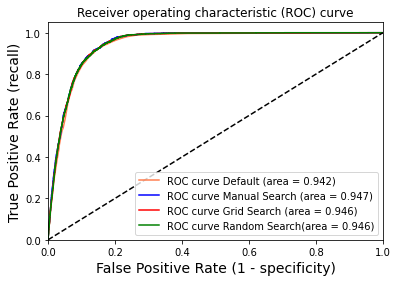

In [ ]:
# grafik Roc Curve Perbandingan Pada Setiap Tuning Parameter

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='coral', label='ROC curve Default (area = %0.3f)' % auc(fpr_rf, tpr_rf))
plt.plot(fpr_rf_man_search, tpr_rf_man_search, color='blue', label='ROC curve Manual Search (area = %0.3f)' % auc(fpr_rf_man_search, tpr_rf_man_search))
plt.plot(fpr_rf_best_grid, tpr_rf_best_grid, color='red', label='ROC curve Grid Search (area = %0.3f)' % auc(fpr_rf_best_grid, tpr_rf_best_grid))
plt.plot(fpr_rf_rfrndm, tpr_rf_rfrndm, color='green', label='ROC curve Random Search(area = %0.3f)' % auc(fpr_rf_rfrndm, tpr_rf_rfrndm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('f1-score Default : ', f1_score(y_test, y_pred_rf, average='weighted'))
print('f1-score Manual Search : ', f1_score(y_test, y_pred_man_search, average='weighted'))
print('f1-score Grid Search : ', f1_score(y_test,y_pred_clf_best_grid, average='weighted'))
print('f1-score Random Search : ', f1_score(y_test,y_pred_clf_rfrndm, average='weighted'))

f1-score Default :  0.8977900855920212
f1-score Manual Search :  0.8906216760955479
f1-score Grid Search :  0.894448161711374
f1-score Random Search :  0.8947938632645317


- Pada pemilihan model random forest dengan tunning parameter berbeda saya memfokuskan pada nilai f1-score seluruh label dan nilai auc atau roc curvenya untuk dijadikan pemilihan model terbaik. Ada 3 model yang nilai f-scorenya tinggi dimana pada model default didapatkan nilai f1-score sebesar 89.78% dengan roc curve sebesar 94.2%, model grid search didapatkan nilai f1-score sebesar 89.445% dengan roc curve sebesar 94.6%, dan pada model random search didapatkan nilai f1-score sebesar 89.47% dengan roc curve sebesar 94.6%. Dari nilai didapat saya memilih 2 model yang memiliki nilai auc tertinggi yaitu grid search dan random search karena nilai aucnya sama, setelah itu dibandingkan nilai f1-scorenya. Dan didapatkan nilai terbaik asumsi saya untuk model random forest ini adalah model dengan tunning parameter Grid Search.

# viii. MODEL INFERENCE

SETELAH TERPILIHNYA MODEL RANDOM FOREST DENGAN TUNING PARAMETER RANDOM SEARCH, SAYA COBA UNTUK DI APLIKASIKAN KE DATASET ORIGINAL

In [ ]:
new_data = df.copy()
new_data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Data original yang dihapus kolom target dan feature yang tidak terpilih pasa saat di EDA
new_data = new_data.drop(['y', 'pdays'], axis=1)

In [ ]:
# Mengambil sample acak dari dataset original
bank_forcast_subscribe = new_data.sample(5)

In [ ]:
bank_forcast_subscribe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25323,40,blue-collar,single,high.school,no,yes,no,cellular,nov,tue,139,2,0,nonexistent,-0.1,93.2,-42.0,4.153,5195.8


In [ ]:
# Label Encoder Untuk Model Inference

bank_forcast_subscribe['job'] = labelencoder.transform(bank_forcast_subscribe['job'])
bank_forcast_subscribe['marital'] = labelencoder.transform(bank_forcast_subscribe['marital'])
bank_forcast_subscribe['education'] = labelencoder.transform(bank_forcast_subscribe['education'])
bank_forcast_subscribe['default'] = labelencoder.transform(bank_forcast_subscribe['default'])
bank_forcast_subscribe['housing'] = labelencoder.transform(bank_forcast_subscribe['housing'])
bank_forcast_subscribe['loan'] = labelencoder.transform(bank_forcast_subscribe['loan'])
bank_forcast_subscribe['contact'] = labelencoder.transform(bank_forcast_subscribe['contact'])
bank_forcast_subscribe['poutcome'] = labelencoder.transform(bank_forcast_subscribe['poutcome'])
bank_forcast_subscribe['day_of_week'] = labelencoder.transform(bank_forcast_subscribe['day_of_week'])
bank_forcast_subscribe['month'] = labelencoder.transform(bank_forcast_subscribe['month'])

In [ ]:
# Dari data sample acak akan diprediksi apakan customer yang dihubungi akan subscribe ke bank kita

result = clf_rf_best_random.predict(scaler.transform(bank_forcast_subscribe))
if(result==1):
    print('Client Will be Subscribe a Term Deposit at Our Bank') 
else:
    print('Client Will Not be Subscribe a Term Deposit at Our Bank')

Client Will Not be Subscribe a Term Deposit at Our Bank


In [ ]:
# Disini untuk melihat hasil prediksi dari model Random Forest 
# Dimana saya mendapatkan model dengan tunning parameter menggunakan random search yang akurasinya tinggi dan model learningnya yang tinnggi juga
# Dan melihat hasil prediksi kita banyak yang benar atau banyak yang salah

result_rf_random = clf_rf_best_random.predict(X_test)

pd.DataFrame({'Actual':y_test, 'Predict':result_rf_random})

,Actual,Predict
40323,0,0
13710,1,0
34594,0,0
39329,1,0
14158,0,0
...,...,...
443,0,0
20398,0,0
40234,1,0
15206,0,0


# ix. CONCLUSION

- Kesimpulan untuk pihak marketing bank bisa fokus kepada client yang memiliki bidang pekerjaan Retired, Entrepreneur, Manajemen untuk difokuskan. Karena indeks kepercayaan konsumen dari ketiga bidang pekerjaan itu lebih berani menggunakan harta atau uang mereka mereka untuk melakukan investai.

- Dataset yang didapatkan adalah dataset dari bank untuk mencari client baru untuk mendeposit uangnya ke bank tersebut, dimana dataset ini terdiri dari 41.188 baris dan 21 kolom yang dimana 20 kolomnya ada feature dan untuk targetnya dengan nama kolom 'y'. Didataset ini tidak ditemukannya missing value pada setiap kolom tetapi ada beberapa outlier yang perlu diperhatikan pada kolom numeriknya. Dan bentuk distribusi pada feature ini cukup lengkap, ada yang normal distribusinya ada juga yang tidak normal positif dan negatif atau bisa disebut juga skewed positif dan negatif. Jadi untuk feature yang distribusinya normal, untuk angka trasholdnya saya gunakan 3 kali standar deviasi dan untuk skewed distribusi saya menentukan nilai trasholdnya 1.5 kali dari nilai IQR.

- Untuk eksplorasi pada data set yang cukup penting dilihat adalah perbandingan antar label pada kolom target, yang dimana setelah dilihat perbandingannya didapatkan adanya ketidak seimbangan antara kedua label pada kolom target. Jadi bisa dibilang dataset ini inbalance. Dan saya juga melakukan beberapa eksplorasi untuk mendapatkan gambaran tentang dataset ini seperti perbandingan status penikahan pada setiap bidang pekerjaan yang dimana didapatkan orang yang single dan divorce tertinggi terdapat pada bidang pekerjaan admin. Setelah itu saya bandingkan lagi tingkat pendidikan dengan bidang pekerjaannya, dan juga saya membandingkan index kepercayaan konsumen dalam mengeluarkan uang untuk membeli kebutuhan, investasi, dll. Dan saya dapatkan bahwa orang yang kepercayaan cukup baik untu mengeluarkan uang ada pada bidang pekerjaan enterpreneur, management, dan juga orang yang sudah pensiun.

- Untuk EDA pada feature yang terdapat pada dataset, didapatkan beberapa feature yang memiliki nilai yang cukup korelasinya antara feature dengan targetnya walapun tidak signifikan. Dan juga saya mengecek nilai vif untuk menditeksi multicollinearity yang dimana ada beberapa feature yang mendapatkan nilai VIF yang cukup tinggi, yang dapat diartikan bahwa feature tersebut memiliki korelasi/ hubungan terhadap feature lainnya. Tetapi saya tetap membawa feature tersebut untuk di uji coba ke model algoritma. Setelah itu saya split data dan handling outlier yang ada pada setiap feature dan ketika data x_train sudah bersih dari outlier dan missing value, saya scaling dataset menggunakan MinMaXScaler yang dimana menurut saya cukup baik digunakan untuk model data classification.

- Setelah itu saya uji coba dataset yang sudah discaling tersebut dengan menggunakan tujuh model yaitu, logistic regression, svm, random forest, decision tree, KNN, Naive Bayes, dan SGD. 

- Pada model Logistic Regression didapatkan nilai accuracy sebesar 0.904 dan nilai auc sebesar 0.929. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 90.4% dan untuk auc didapatkan nilai sebesar 92.9% yang dapat diartikan bahwa model dapat belajar untuk memprediksi data baru yang masuk dengan tingkat learning model tersebut sebesar 92.9%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 89.514%. 

- Pada model Support Vector Machine didapatkan nilai accuracy sebesar 0.90. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 90.4%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 87.013%. 

- Pada model Random Forest didapatkan nilai accuracy sebesar 0.907 dan nilai auc sebesar 0.942. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 90.7% dan untuk auc didapatkan nilai sebesar 94.2% yang dapat diartikan bahwa model dapat belajar untuk memprediksi data baru yang masuk dengan tingkat learning model tersebut sebesar 94.2%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 89.778%.

- Pada model Decision Tree didapatkan nilai accuracy sebesar 0.887 dan nilai auc sebesar 0.708. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 88.7% dan untuk auc didapatkan nilai sebesar 70.8% yang dapat diartikan bahwa model dapat belajar untuk memprediksi data baru yang masuk dengan tingkat learning model tersebut sebesar 70.8%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 88.564%.

- Pada model KNN didapatkan nilai accuracy sebesar 0.895 dan nilai auc sebesar 0.837. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 89.5% dan untuk auc didapatkan nilai sebesar 83.7% yang dapat diartikan bahwa model dapat belajar untuk memprediksi data baru yang masuk dengan tingkat learning model tersebut sebesar 83.7%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 87.817%.

- Pada model Gaussian Naive Bayes didapatkan nilai accuracy sebesar 0.808 dan nilai auc sebesar 0.877. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 80.8% dan untuk auc didapatkan nilai sebesar 87.7% yang dapat diartikan bahwa model dapat belajar untuk memprediksi data baru yang masuk dengan tingkat learning model tersebut sebesar 87.7%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 83.729%.

- Pada model Stochastic Gradient Descent didapatkan nilai accuracy sebesar 0.8967. Yang dapat diartikan bahwa nilai akurasi untuk memprediksi hasil target dari dataset yang berisi feature, akurasi kebenaran dari prediksi model tersebut sebesar 89.92%. Dan yang penting untuk perbandingan model adalah nilai f1-score seluruh label yang dimana pada model ini didapatkan nilai f1-score sebesar 87.794%. 

- Setelah dibandingkan ketujuh model tersebut didapatkan nilai f1-score label tertinggi adalah model Random Forest yang dimana model itu saya pilih dan setelah saya ditunning parameter model random forest menggunakan 3 cara yaitu manual search, random search, grid search, dan juga default/ basic parameter. Dan didapatkan Ada 3 model yang nilai f-scorenya tinggi dimana pada model default didapatkan nilai f1-score sebesar 89.78% dengan roc curve sebesar 94.2%, model grid search didapatkan nilai f1-score sebesar 89.445% dengan roc curve sebesar 94.6%, dan pada model random search didapatkan nilai f1-score sebesar 89.47% dengan roc curve sebesar 94.6%. Dari nilai didapat saya memilih 2 model yang memiliki nilai auc tertinggi yaitu grid search dan random search karena nilai aucnya sama, setelah itu dibandingkan nilai f1-scorenya. Dan didapatkan nilai terbaik asumsi saya untuk model random forest ini adalah model dengan tunning parameter Random Search. Dan terakhir saya coba test model terbaik dengan parameter tunning terbaik untuk diuji coba ke model inference, dan model tersebut dapat memprediksi dataset dengan baik.